(-0.5, 239.5, 319.5, -0.5)

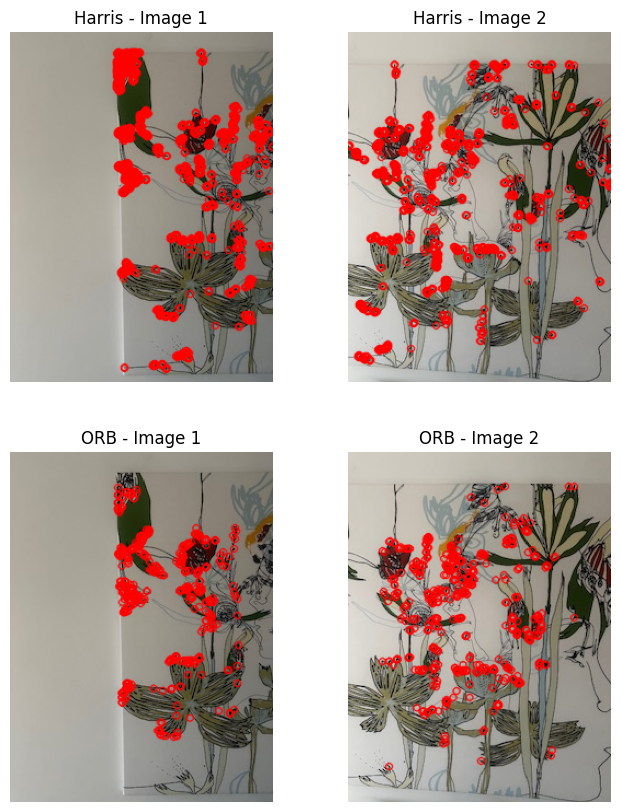

In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def harris_feature_detector(image_path, threshold, alpha):

    img = cv2.imread(image_path)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute gradients
    I_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    I_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)


    # Auto-correlation matrix/structure tensor components
    I_x2 = I_x**2
    I_y2 = I_y**2
    I_xy = I_x*I_y

    # Apply gaussian smoothing to reduce noise 
    I_x2 = cv2.GaussianBlur(I_x2, (3, 3), 1)
    I_y2 = cv2.GaussianBlur(I_y2, (3, 3), 1)
    I_xy = cv2.GaussianBlur(I_xy, (3, 3), 1)

    # Compute corner response function
    det_A = I_x2*I_y2 - (I_xy**2)
    trace_A = I_x2 + I_y2
    R = det_A - alpha*(trace_A**2)

    # Determine corners based on threshold
    R_norm = cv2.normalize(R, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    feature_map = R_norm > threshold

    # Convert detected corners to cv2.KeyPoint objects
    # Did this to easier be able to compare to OpenCV feature detectors like ORB.
    kp = [cv2.KeyPoint(float(x), float(y), 1) for y, x in np.argwhere(feature_map)]

    img_kp = cv2.drawKeypoints(img, kp, None, color=(0, 0 , 255), flags = 0)
    return img_kp

def orb_feature_detector(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create()

    kp = orb.detect(img_gray, None)
    kp, des = orb.compute(img_gray, kp)

    img_kp = cv2.drawKeypoints(img, kp, None, color=(0, 0, 255), flags=0)

    return img_kp


    

img_harris_1 = harris_feature_detector("img1.jpg", 0.3, 0.04)
img_harris_2 = harris_feature_detector("img2.jpg", 0.3, 0.04)
img_orb_1 = orb_feature_detector("img1.jpg")
img_orb_2 = orb_feature_detector("img2.jpg")



plt.figure(figsize=(8, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img_harris_1, cv2.COLOR_BGR2RGB))
plt.title("Harris - Image 1")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_harris_2, cv2.COLOR_BGR2RGB))
plt.title("Harris - Image 2")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_orb_1, cv2.COLOR_BGR2RGB))
plt.title("ORB - Image 1")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_orb_2, cv2.COLOR_BGR2RGB))
plt.title("ORB - Image 2")
plt.axis("off")

